In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn

seaborn.set(style="ticks")
seaborn.set(font_scale=1.2)  
seaborn.set_style("darkgrid")

In [3]:
df_2d = pd.read_json("data_2d.json")
df_2d = df_2d.set_index("Number of cells").drop(16).reset_index()

In [4]:
df_2d["Time (speedup)"] = df_2d["Time (PETSc)"] / df_2d["Time (ufl.action)"]
df_2d["Cost (PETSc)"] = df_2d["Number of cells"]*df_2d["Number of quadrature points"]*(df_2d["Degree"]+1)**(2*df_2d["Dimension"])
df_2d["Cost (ufl.action)"] = df_2d["Number of cells"]*df_2d["Number of quadrature points"]*(df_2d["Degree"]+1)**df_2d["Dimension"]
df_2d["Cost (speedup)"] = df_2d["Cost (PETSc)"] / df_2d["Cost (ufl.action)"]

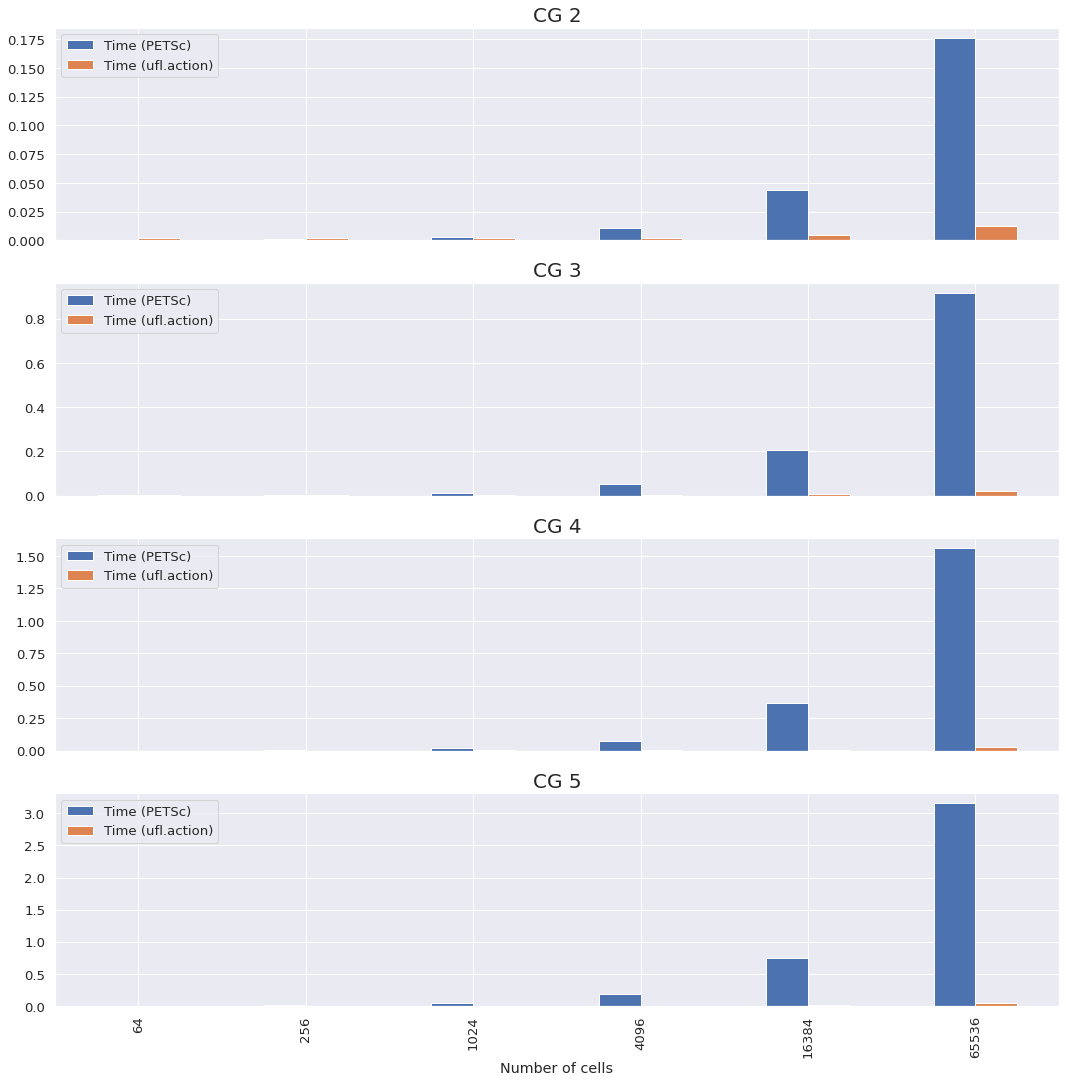

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_2d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Time (PETSc)', 'Time (ufl.action)'])
    ax[p-2].set_title("CG {}".format(p), size=20)

plt.savefig("timing_2d.pdf")

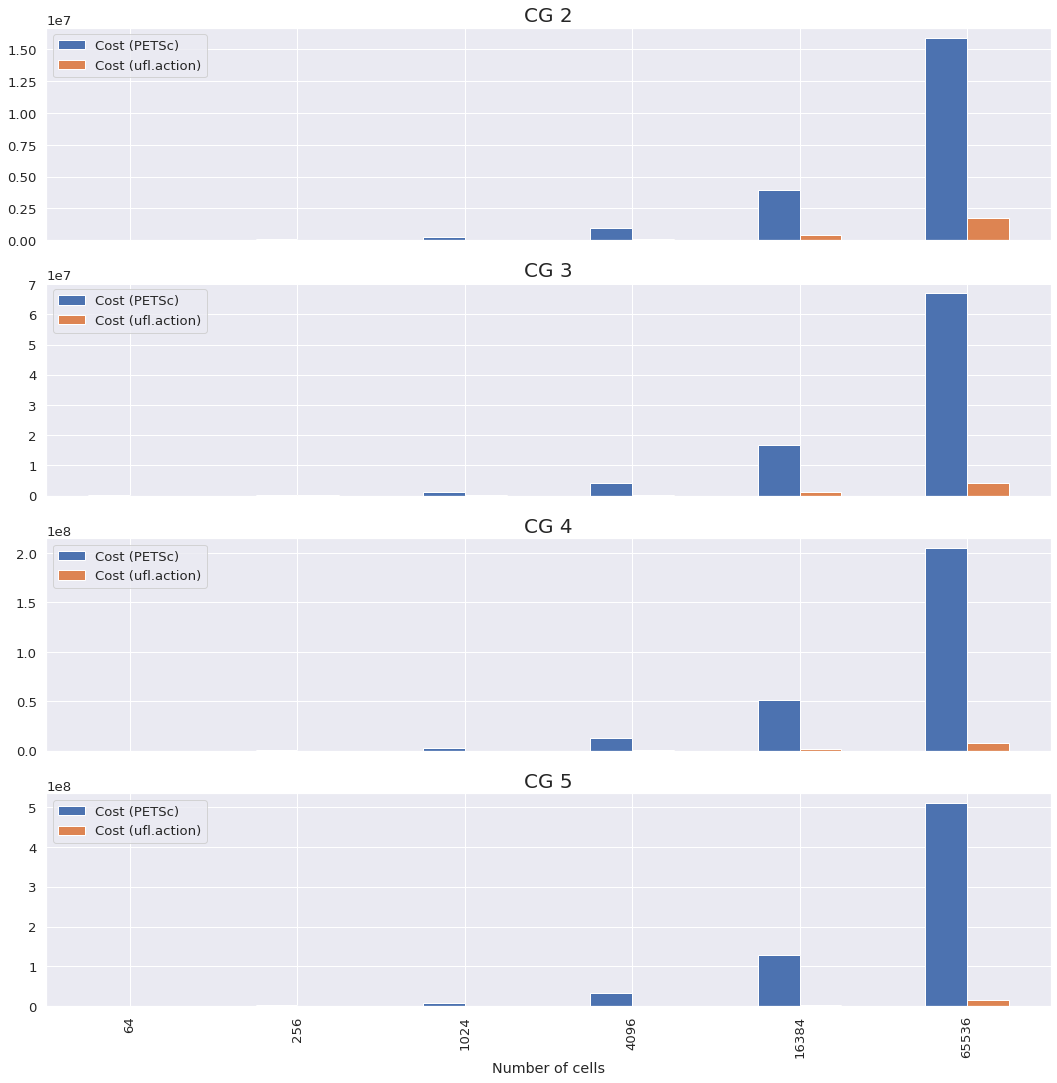

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_2d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Cost (PETSc)', 'Cost (ufl.action)'])
    ax[p-2].set_title("CG {}".format(p), size=20)

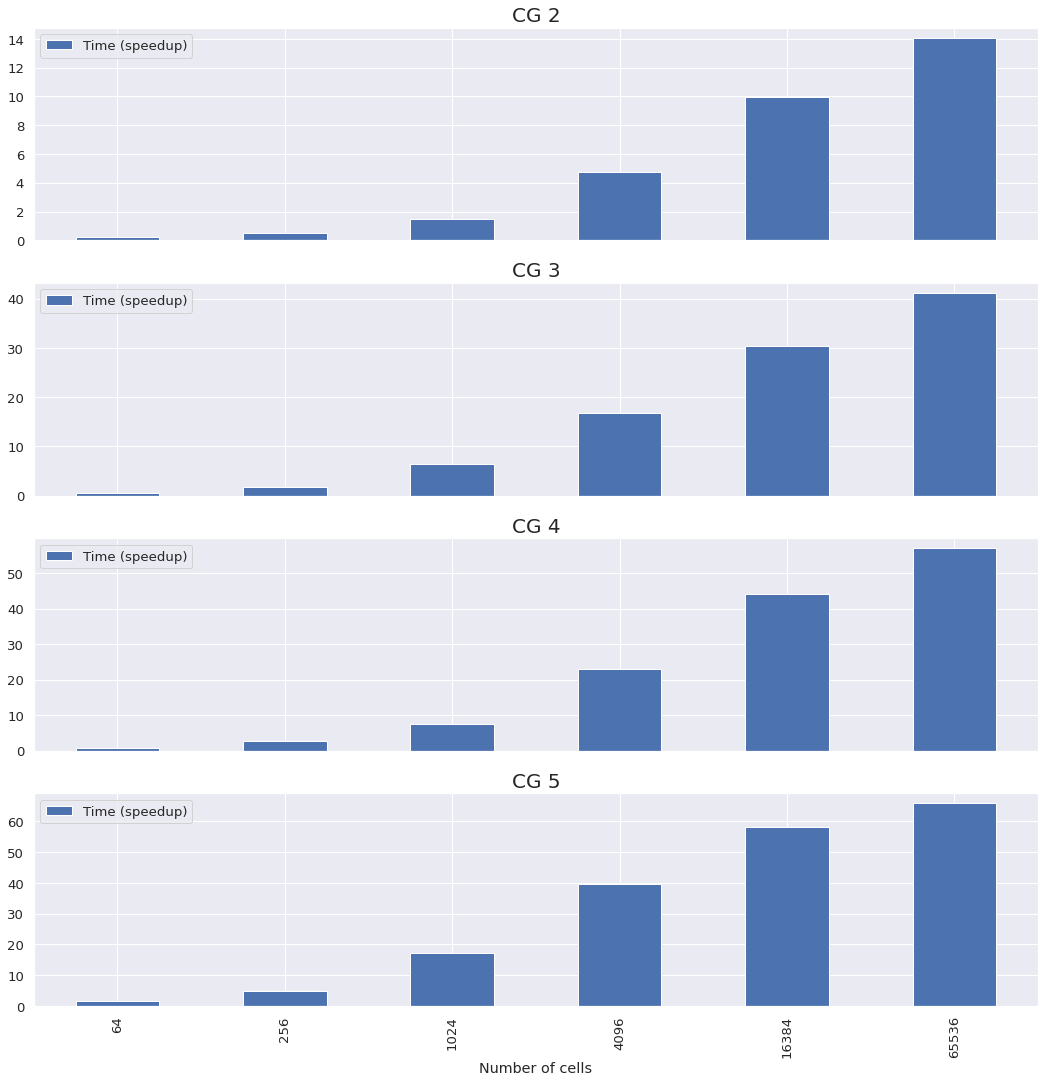

In [7]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_2d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Time (speedup)'])
    ax[p-2].set_title("CG {}".format(p), size=20)
    
plt.savefig("speedup_2d.pdf")

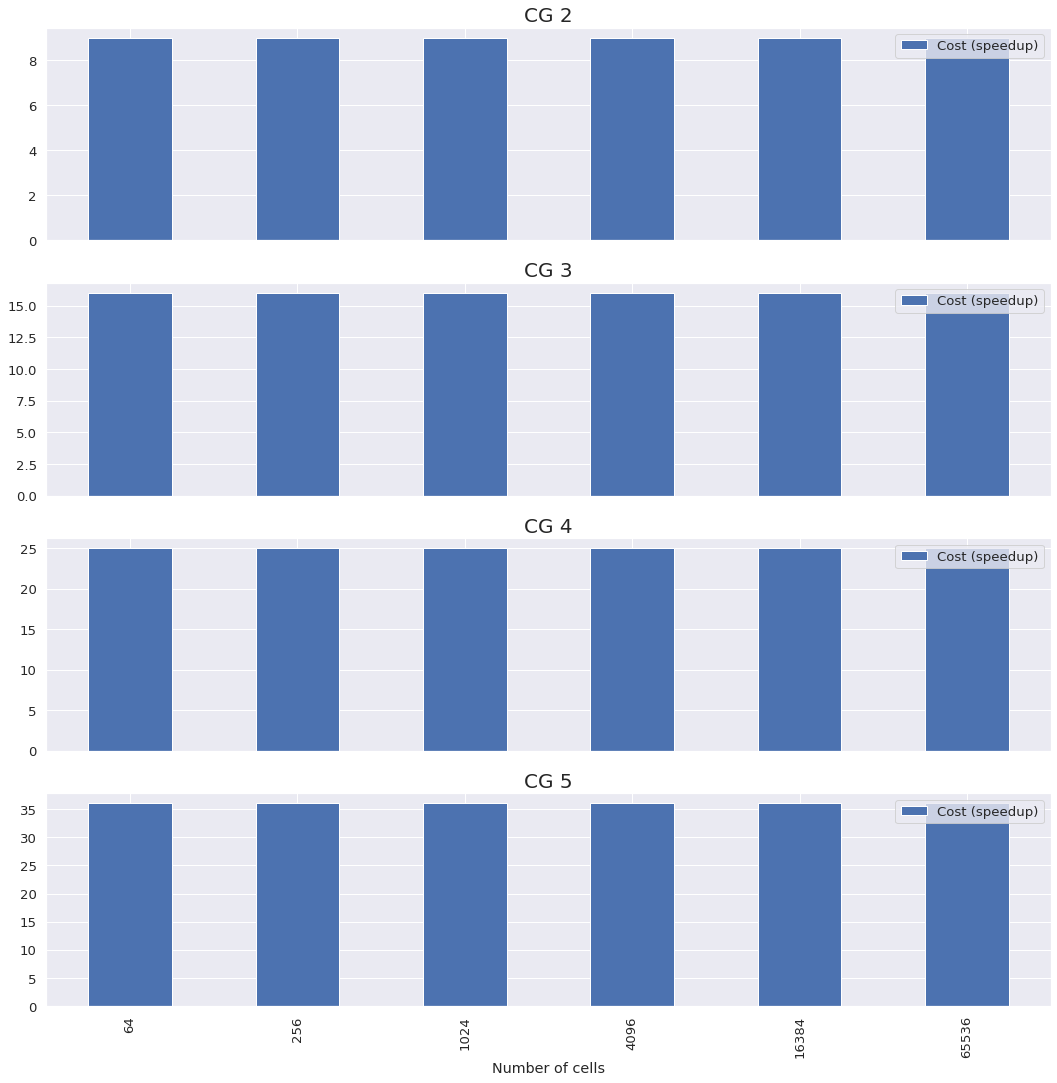

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_2d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Cost (speedup)'])
    ax[p-2].set_title("CG {}".format(p), size=20)

In [9]:
df_3d = pd.read_json("data_3d.json")
df_3d = df_3d.set_index("Number of cells").drop(8).reset_index()

In [10]:
df_3d["Time (speedup)"] = df_3d["Time (PETSc)"] / df_3d["Time (ufl.action)"]
df_3d["Cost (PETSc)"] = df_3d["Number of cells"]*df_3d["Number of quadrature points"]*(df_3d["Degree"]+1)**(2*df_3d["Dimension"])
df_3d["Cost (ufl.action)"] = df_3d["Number of cells"]*df_3d["Number of quadrature points"]*(df_3d["Degree"]+1)**df_3d["Dimension"]
df_3d["Cost (speedup)"] = df_3d["Cost (PETSc)"] / df_3d["Cost (ufl.action)"]

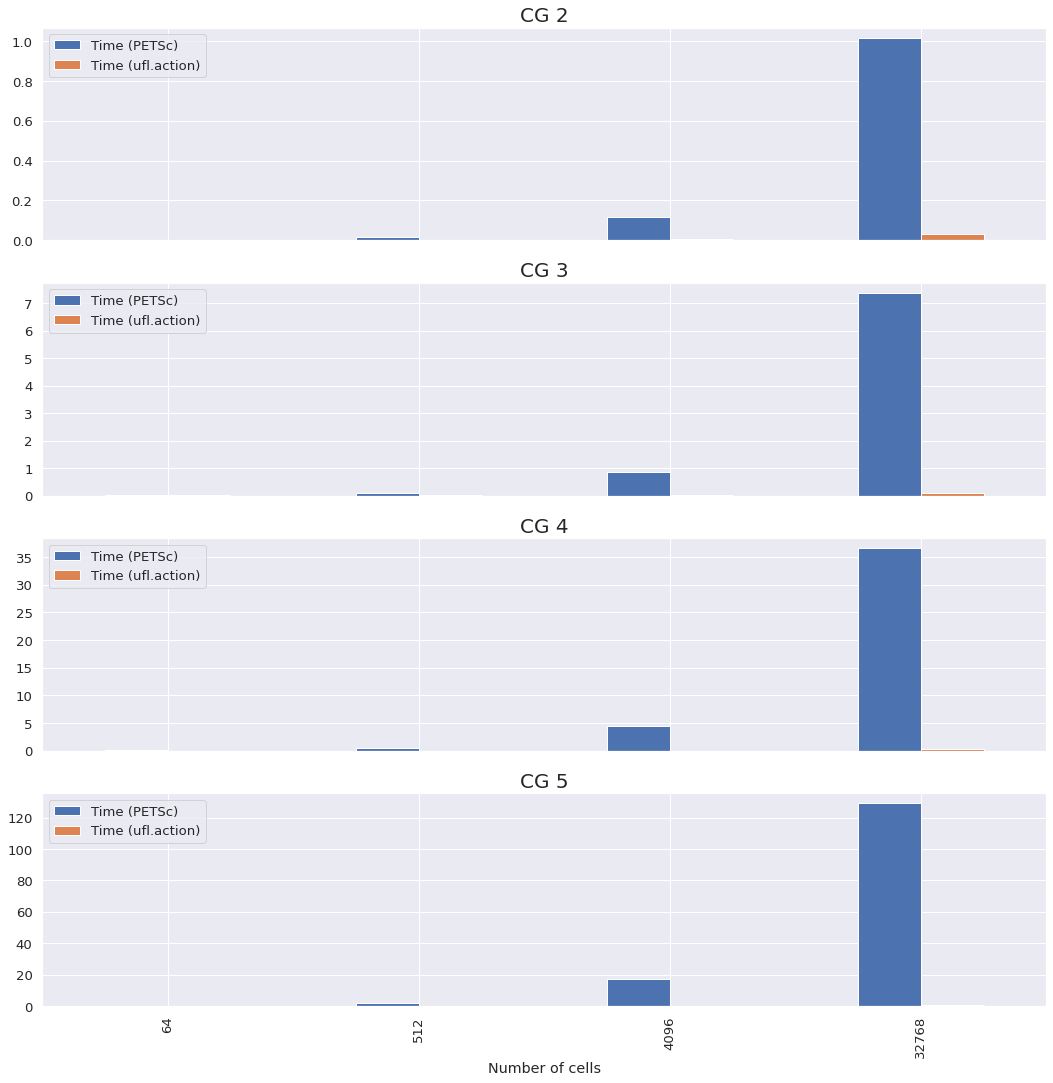

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_3d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Time (PETSc)', 'Time (ufl.action)'])
    ax[p-2].set_title("CG {}".format(p), size=20)

plt.savefig("timing_3d.pdf")

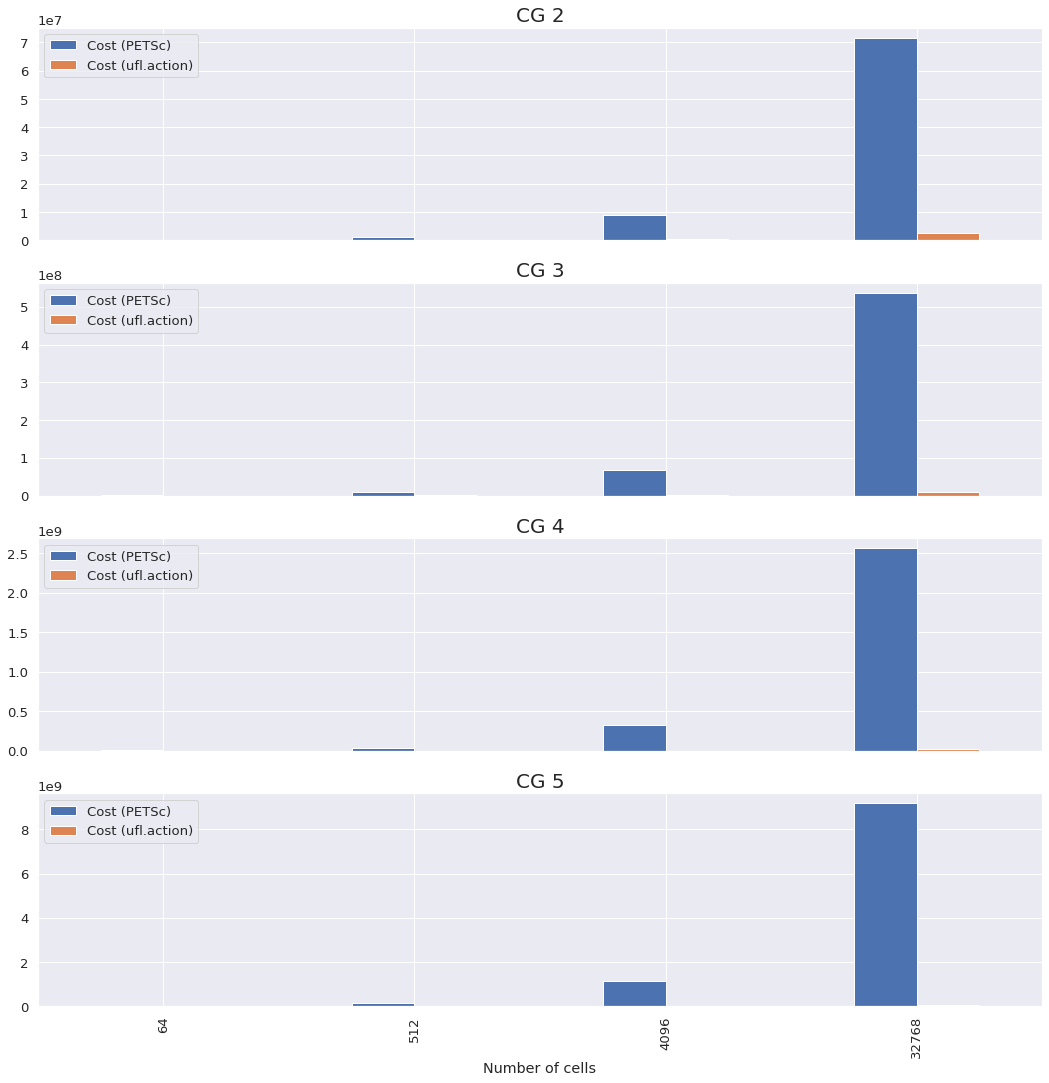

In [12]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3,4, 5]:
    df_3d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Cost (PETSc)', 'Cost (ufl.action)'])
    ax[p-2].set_title("CG {}".format(p), size=20)

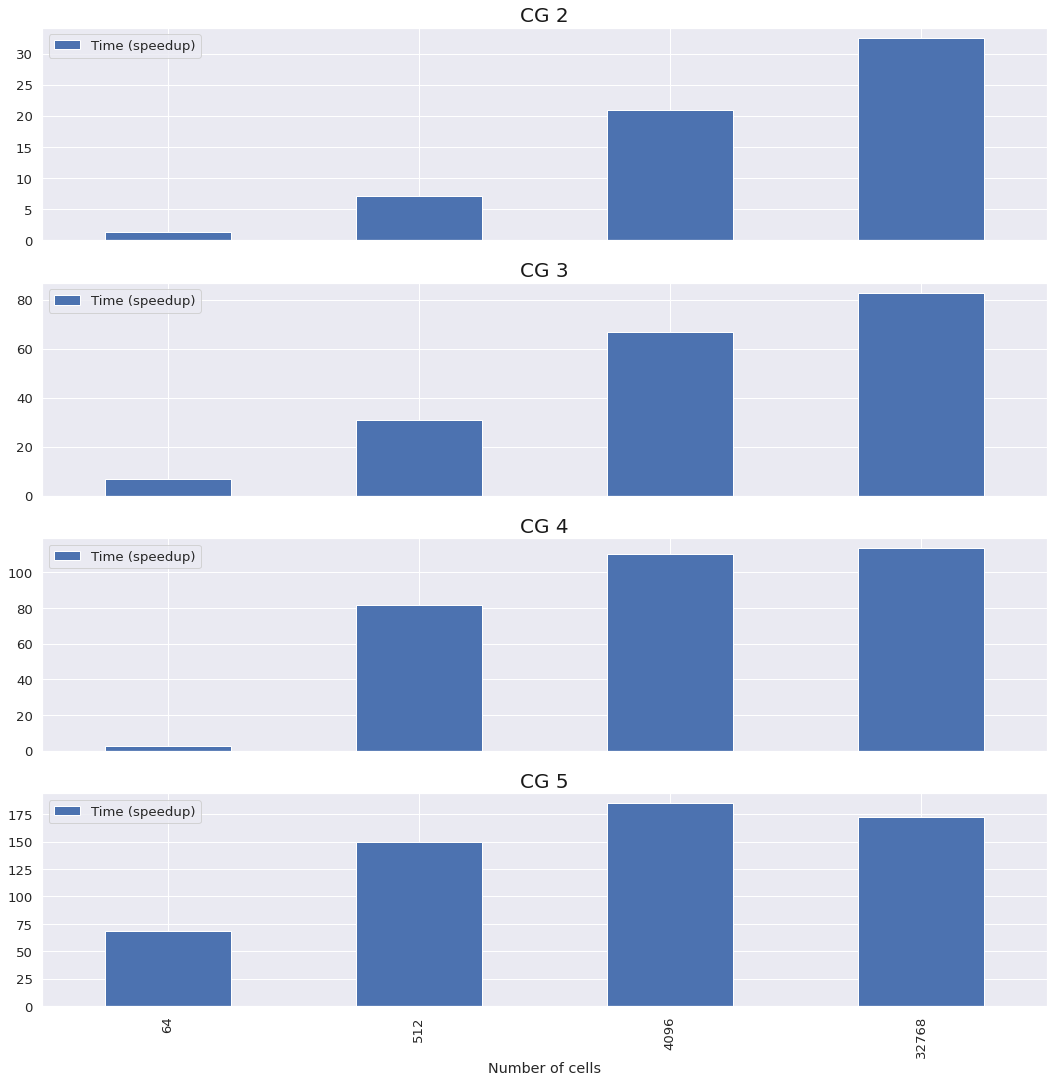

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3, 4, 5]:
    df_3d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Time (speedup)'], color='C0')
    ax[p-2].set_title("CG {}".format(p), size=20, color='k')
    
plt.savefig("speedup_3d.pdf")

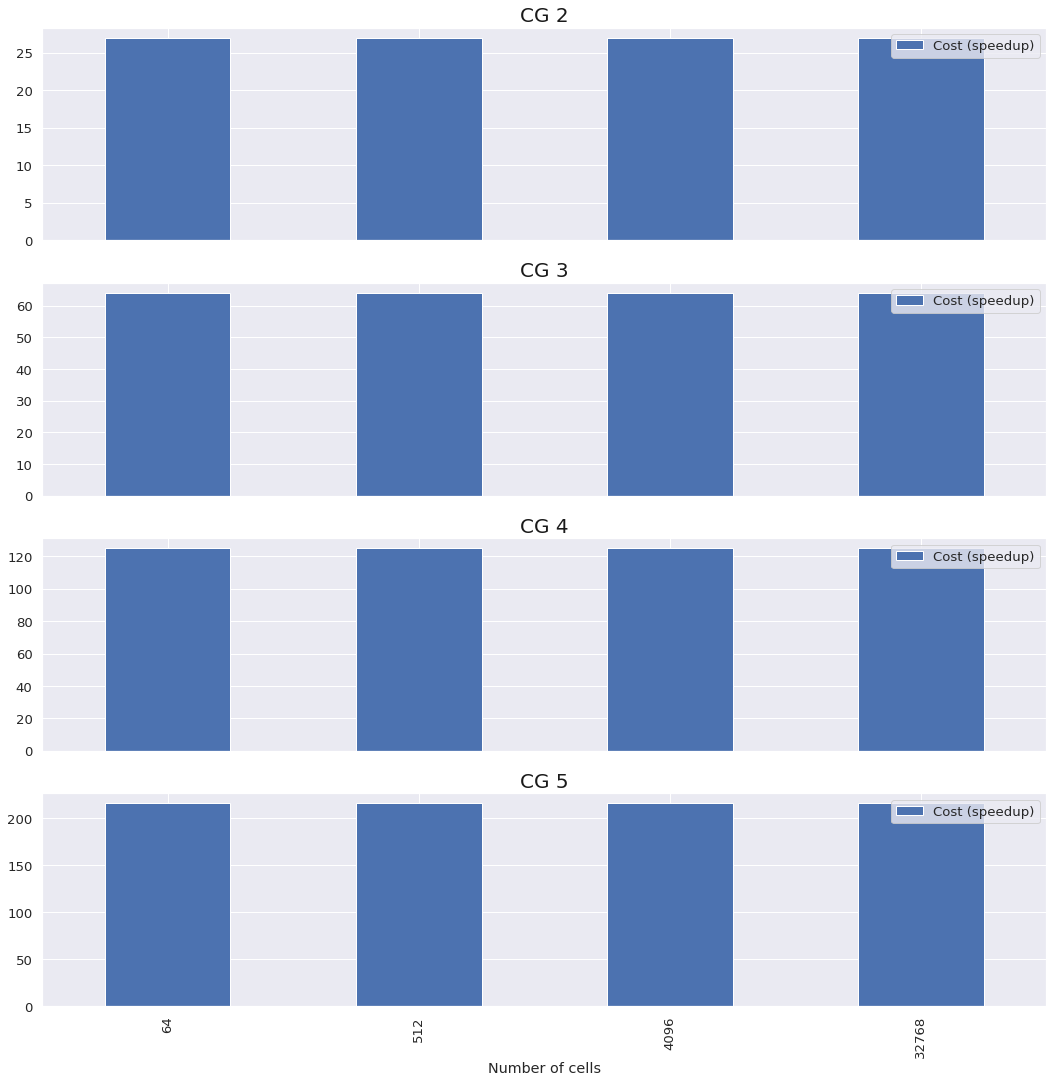

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(18, 18), sharex=True)

for p in [2, 3, 4, 5]:
    df_3d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[[p]].plot.bar(ax=ax[p-2], x='Number of cells', y=['Cost (speedup)'], color='C0')
    ax[p-2].set_title("CG {}".format(p), size=20, color='k')

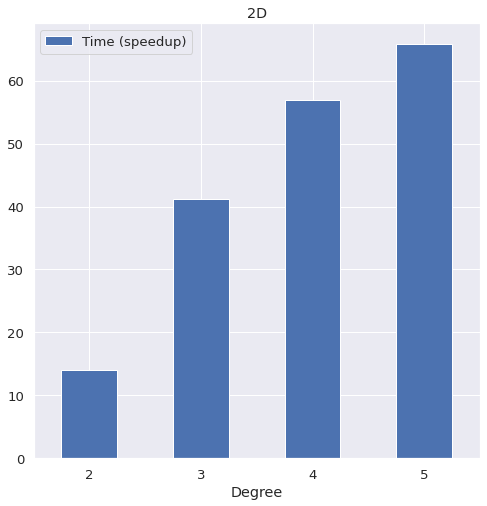

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))

df_2d.set_index("Options").loc["-Ofast"].groupby("Degree").max("Time (speedup)").plot.bar(ax=ax, y="Time (speedup)", rot=0)
plt.title("2D")

plt.savefig("max_speedup_degree_2d.pdf")

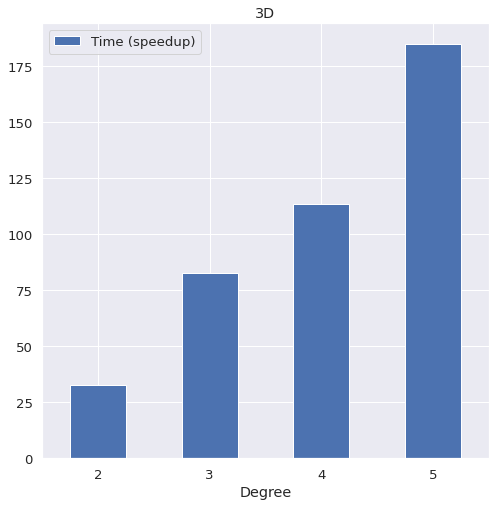

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

df_3d.set_index("Options").loc["-Ofast"].groupby("Degree").max("Time (speedup)").plot.bar(ax=ax, y="Time (speedup)", rot=0)
plt.title("3D")

plt.savefig("max_speedup_degree_3d.pdf")

<AxesSubplot:xlabel='Number of cells'>

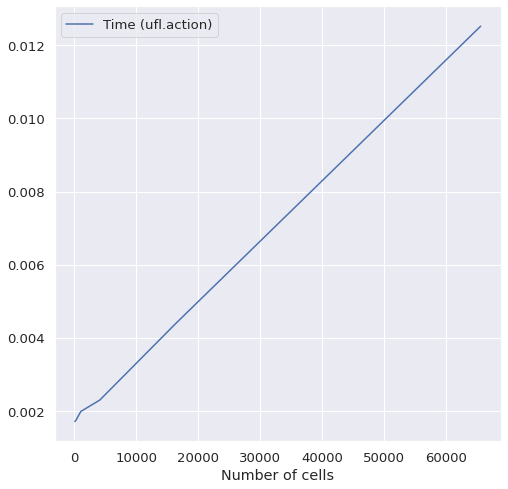

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

df_2d.set_index("Options").loc["-Ofast"].set_index("Degree").loc[2].plot(ax=ax, x="Number of cells", y="Time (ufl.action)")

<AxesSubplot:xlabel='Number of cells'>

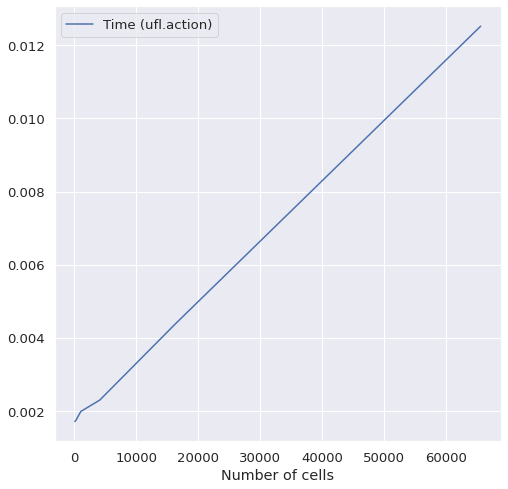

In [18]:
fig, ax = plt.subplots(figsize=(8, 8))

df_2d.set_index("Options").loc["-Ofast"].set_index("Number of quadrature points").loc[3].plot(ax=ax, x="Number of cells", y="Time (ufl.action)")